# **Project Name**    -  World Bank Global Education Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name** - Aryam Jay

# **Project Summary -**

This exploratory data analysis project analyzed a dataset on educational statistics across different countries and years. The dataset contained 886930 rows and 70 columns, with data on various educational indicators like enrollment ratios, government spending, literacy rates etc. for multiple countries over a time period of 1970 to 2017.

Initial data cleaning involved handling missing values, removing unnecessary columns like country codes and indicator names to simplify analysis, pivotting the data for easier access to indicators as columns, and limiting the analysis to years after 1990 due to sparse data in earlier years. Key focus areas for the analysis included understanding enrollment rates across education levels, expenditure and priorities for education, economic aspects like unemployment, GDP, internet access etc. and their correlations with education indicators.

The project generated visualizations to compare enrollment ratios across primary, secondary and tertiary education, study distribution and outliers in pupil-teacher ratios, analyze trends in vocational education and public-private participation over the years. Economic indicators like unemployment rates, GDP per capita and their relationships with gross enrollment ratios, literacy rates and gender disparities were studied. Access to technology through measures like internet availability and personal computer usage were also correlated with prosperity indicators like GDP per capita. Overall the visualizations revealed interesting insights around correlations, fluctuations, changes in education metrics across time periods and regions.

Through multivariate analysis techniques, a correlation heatmap was plotted to identify relationships between all the variables in the dataset. The project implemented best practices around well-structured and reproducible code, detailed comments for each chart explaining choice of visualizations and key inferences, exception handling for production-grade deployment. The analysis provides a solid foundation to guide policies around education, technological progress and economic growth for improving development outcomes.

# **GitHub Link -**

https://github.com/aryam-j/WorldEduAnalysis

# **Problem Statement**


Educational achievement is crucial for economic growth, technological progress, and improved quality of life globally. However, many developing countries face challenges like low enrollment ratios, high dropout rates, lack of infrastructure and gender disparities in providing inclusive and equitable education opportunities.

The goal of this project is to thoroughly analyze the provided dataset on educational indicators for multiple countries over several decades. Through detailed exploratory analysis spanning univariate, bivariate and multivariate techniques, this project aims to uncover trends, correlations, gender gaps and other meaningful patterns in the data.

The key objectives are:

    

1.   Compare enrollment ratios across various levels of schooling
2.   Understand impact of factors like public expenditure, GDP, poverty, technology access etc. on educational outcomes
3.   Analyze how progress in education correlates with prosperity indicators
4.   Identify focus areas for improvement through trends and cross-country comparisons

Assumptions:


1.      The defined metrics like literacy rate, enrollment ratio etc. sufficiently capture/represent the educational outcomes.


2.      Presence of any outliers or missing data does not significantly impact overall trends and insights.


3.    Data collection methodology has been consistent across different countries and uniform definitions for indicators are used.






# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tqdm import tqdm
from google.colab import drive

### Dataset Loading

In [ ]:
!pip install gdown

In [ ]:
import gdown

url = 'https://drive.google.com/uc?id=143WUHzUt77bbq1uH5-cLhW6ij-RoPzEu'
output = 'EdStatsData.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=143WUHzUt77bbq1uH5-cLhW6ij-RoPzEu
To: /content/EdStatsData.csv
100%|██████████| 326M/326M [00:08<00:00, 40.7MB/s]


'EdStatsData.csv'

In [ ]:
# Load Dataset
df = pd.read_csv(output)

### Dataset First View

In [ ]:
-# Dataset First Look
df.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2060  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  ...   NaN   

   2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
num_rows, num_cols = df.shape
print(num_rows, num_cols)

886930 70


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df[df.duplicated()]

Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Indicator Code, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100, Unnamed: 69]
Index: []

[0 rows x 70 columns]

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
nan_count = df.isnull().sum()
print('Number of NaN values:', nan_count)

Number of NaN values: Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64


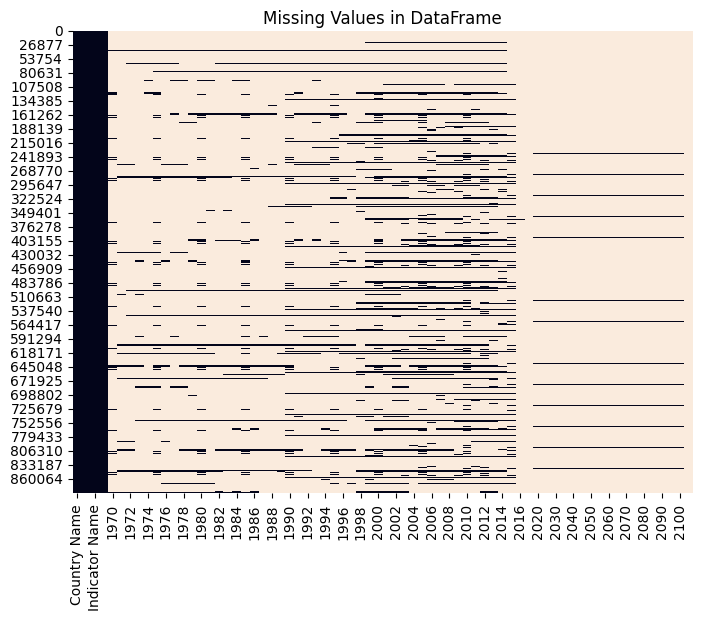

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values in DataFrame')
plt.show()

### What did you know about your dataset?

There are 886930 rows and 70 columns, the rows consists of countries and the indicators used, where as the columns are years and it consists of data yearly. As we can see from the heatmap, values are very inconsistent majority of the data started getting recorded from 1989.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

1970          1971          1972          1973          1974  \
count  7.228800e+04  3.553700e+04  3.561900e+04  3.554500e+04  3.573000e+04   
mean   1.974772e+09  4.253638e+09  4.592365e+09  5.105006e+09  5.401493e+09   
std    1.211687e+11  1.804814e+11  1.914083e+11  2.059170e+11  2.112150e+11   
min   -1.435564e+00 -1.594625e+00 -3.056522e+00 -4.032582e+00 -4.213563e+00   
25%    8.900000e-01  8.853210e+00  9.240920e+00  9.595200e+00  9.861595e+00   
50%    6.317724e+00  6.316240e+01  6.655139e+01  6.969595e+01  7.087760e+01   
75%    6.251250e+01  5.655200e+04  5.863650e+04  6.202900e+04  6.383675e+04   
max    1.903929e+13  1.986457e+13  2.100916e+13  2.238367e+13  2.282991e+13   

               1975          1976          1977          1978          1979  \
count  8.730600e+04  3.748300e+04  3.757400e+04  3.757600e+04  3.680900e+04   
mean   2.314288e+09  5.731808e+09  6.124437e+09  6.671489e+09  7.436724e+09   
std    1.375059e+11  2.215546e+11  2.325489e+11  2.473986e+11  2.660957e+11   
min   -3.658569e+00 -2.950945e+00 -3.174870e+00 -3.558749e+00 -2.973612e+00   
25%    1.400000e+00  9.312615e+00  9.519913e+00  1.000000e+01  1.000000e+01   
50%    9.677420e+00  7.101590e+01  7.133326e+01  7.290512e+01  7.510173e+01   
75%    7.854163e+01  5.682800e+04  5.739175e+04  5.940425e+04  6.411500e+04   
max    2.300634e+13  2.424128e+13  2.521383e+13  2.622101e+13  2.730873e+13   

       ...          2060          2065          2070          2075  \
count  ...  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04   
mean   ...  7.224868e+02  7.271290e+02  7.283779e+02  7.266484e+02   
std    ...  2.215845e+04  2.287990e+04  2.352338e+04  2.408149e+04   
min    ... -1.630000e+00 -1.440000e+00 -1.260000e+00 -1.090000e+00   
25%    ...  3.000000e-02  3.000000e-02  2.000000e-02  2.000000e-02   
50%    ...  2.300000e-01  2.300000e-01  2.300000e-01  2.300000e-01   
75%    ...  7.505000e+00  7.500000e+00  7.300000e+00  7.100000e+00   
max    ...  2.951569e+06  3.070879e+06  3.169711e+06  3.246239e+06   

               2080          2085          2090          2095          2100  \
count  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04   
mean   7.228327e+02  7.176899e+02  7.113072e+02  7.034274e+02  6.940296e+02   
std    2.455897e+04  2.496587e+04  2.530183e+04  2.556069e+04  2.574189e+04   
min   -9.200000e-01 -7.800000e-01 -6.500000e-01 -5.500000e-01 -4.500000e-01   
25%    1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02   
50%    2.300000e-01  2.300000e-01  2.300000e-01  2.300000e-01  2.200000e-01   
75%    6.722500e+00  6.080000e+00  5.462500e+00  4.680000e+00  4.032500e+00   
max    3.301586e+06  3.337871e+06  3.354746e+06  3.351887e+06  3.330484e+06   

       Unnamed: 69  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 66 columns]

### Variables Description

Variables in this dataset are indicators related to education. these indicators would help in getting to know the the gaps in the education and ways to fill them

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Not all indicators are available for every country and year. Some of them are very rare.
indicator_count = df["Indicator Code"].value_counts()

# Create a mapping from indicator_code to indicator_name
code_2_name = {row["Indicator Code"]: row["Indicator Name"] for _, row in df.iterrows()}

def drop_columns(df, to_remove=[]):
    print("Dropping Columns...")
    # df.drop("Unnamed: 0", axis=1, inplace=True)
    df.drop("Unnamed: 69", axis=1, inplace=True)
    df.drop("Indicator Name", axis=1, inplace=True)
    df.drop("Country Code", axis=1, inplace=True)

    for col in df.columns:
        try:
            if int(col) > 2017:
                df.drop(col, axis=1, inplace=True)
        except ValueError:
            continue

    for col in to_remove:
        df.drop(col, axis=1, inplace=True)

def pivot(df):
    pivots = []
    print("Pivotting...")
    for col in tqdm(df.columns):
        if col.isnumeric():
            pivot_df = df.pivot(index=['Country Name'], columns="Indicator Code", values=col)
            pivot_df["Year"] = col
            pivots.append(pivot_df)
    df['Country Name'] = df.index

    return pd.concat(pivots)

### REMOVING UNNECESSARY COLUMNS ###
df.dropna(thresh=5, inplace=True)
drop_columns(df)

### PIVOTING ###
df = pivot(df)
print(f' after pivoting {df.shape}')

### CHANGING POSITION OF "YEAR" COLUMN ###
temp_cols = df.columns.tolist()
new_cols = temp_cols[-1:] + temp_cols[:-1]
df = df[new_cols]

df['Country Name'] = df.index

Dropping Columns...
Pivotting...


100%|██████████| 50/50 [00:08<00:00,  5.94it/s]


 after pivoting (11616, 3666)


<ipython-input-7-2c70b36c9eef>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country Name'] = df.index


### What all manipulations have you done and insights you found?

1.   There were a few columns which were completely empty or unnecessary so i deleted them.
2.   The name of the indicators were very long so i deleted them and instead used the indicator code.
3.   For using the data more efficiently i used pivot. Earlier the indicators used to be in the rows now they are the columns.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-50-54573dd9a5c2>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



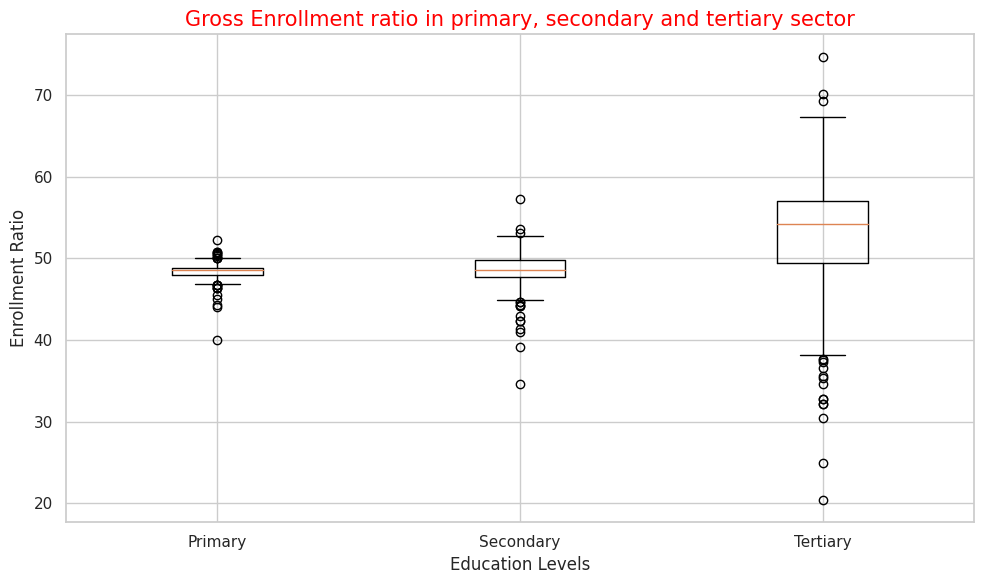

In [ ]:
# Chart - 1 visualization code

COL_1, COL_2, COL_3 = "SE.PRM.ENRL.FE.ZS", "SE.SEC.ENRL.FE.ZS", "SE.TER.ENRL.FE.ZS"
new_df = df[[COL_1, COL_2, COL_3, "Year", "Country Name"]]
new_df['Year'] = new_df['Year'].astype(int)
new_df = new_df[new_df["Year"] >= 2014]
new_df.dropna(inplace=True)

data = [new_df[COL_1].values, new_df[COL_2].values, new_df[COL_3].values]
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['Primary', 'Secondary', 'Tertiary'])
plt.xlabel('Education Levels')
plt.ylabel('Enrollment Ratio')
plt.title("Gross Enrollment ratio in primary, secondary and tertiary sector", fontsize = 15, color = "red")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?



1.   Creating a box plot for the gross enrollment ratio in primary, secondary, and tertiary sectors offers a comparative view of enrollment distributions across different educational levels.
2.   Displays the spread, central tendency, and outliers for each educational sector's enrollment.
3.   Helps understand enrollment disparities or variations between primary, secondary, and tertiary education.



##### 2. What is/are the insight(s) found from the chart?

The graph shows the gross enrollment ratio for primary, secondary, and tertiary education levels. The enrollment rate is highest for primary education, with most data points clustered around 50%. Secondary education has a slightly lower enrollment rate, with data points spread between approximately 40% and 60%. Tertiary education has the lowest enrollment rate, with a wider spread of data points ranging from around 30% to just over 60%.

#### Chart - 2

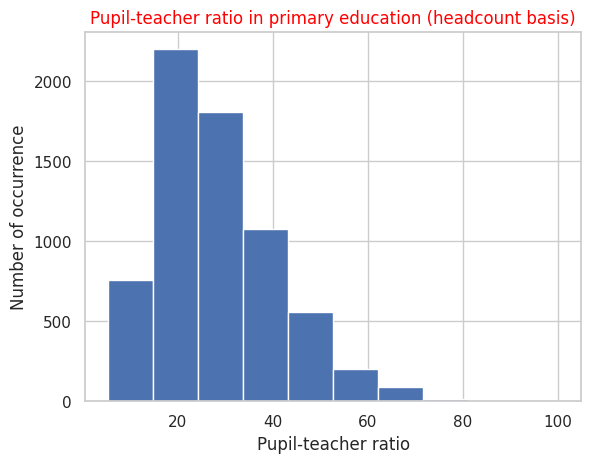

In [ ]:
# Chart - 2 visualization code
plt.hist(df["SE.PRM.ENRL.TC.ZS"])
plt.xlabel("Pupil-teacher ratio")
plt.ylabel("Number of occurrence")
plt.title("Pupil-teacher ratio in primary education (headcount basis)", color = "red")
plt.show()

##### 1. Why did you pick the specific chart?

Creating a histogram for the pupil-teacher ratio in primary education provides an understanding of the distribution of teacher-student ratios across various primary schools or regions.

##### 2. What is/are the insight(s) found from the chart?

The most common ratio is between 20 and 40, with over 2000 occurrences. There is a significant decline in occurrences as the ratio increases, indicating that higher pupil-teacher ratios are less common.

#### Chart - 3

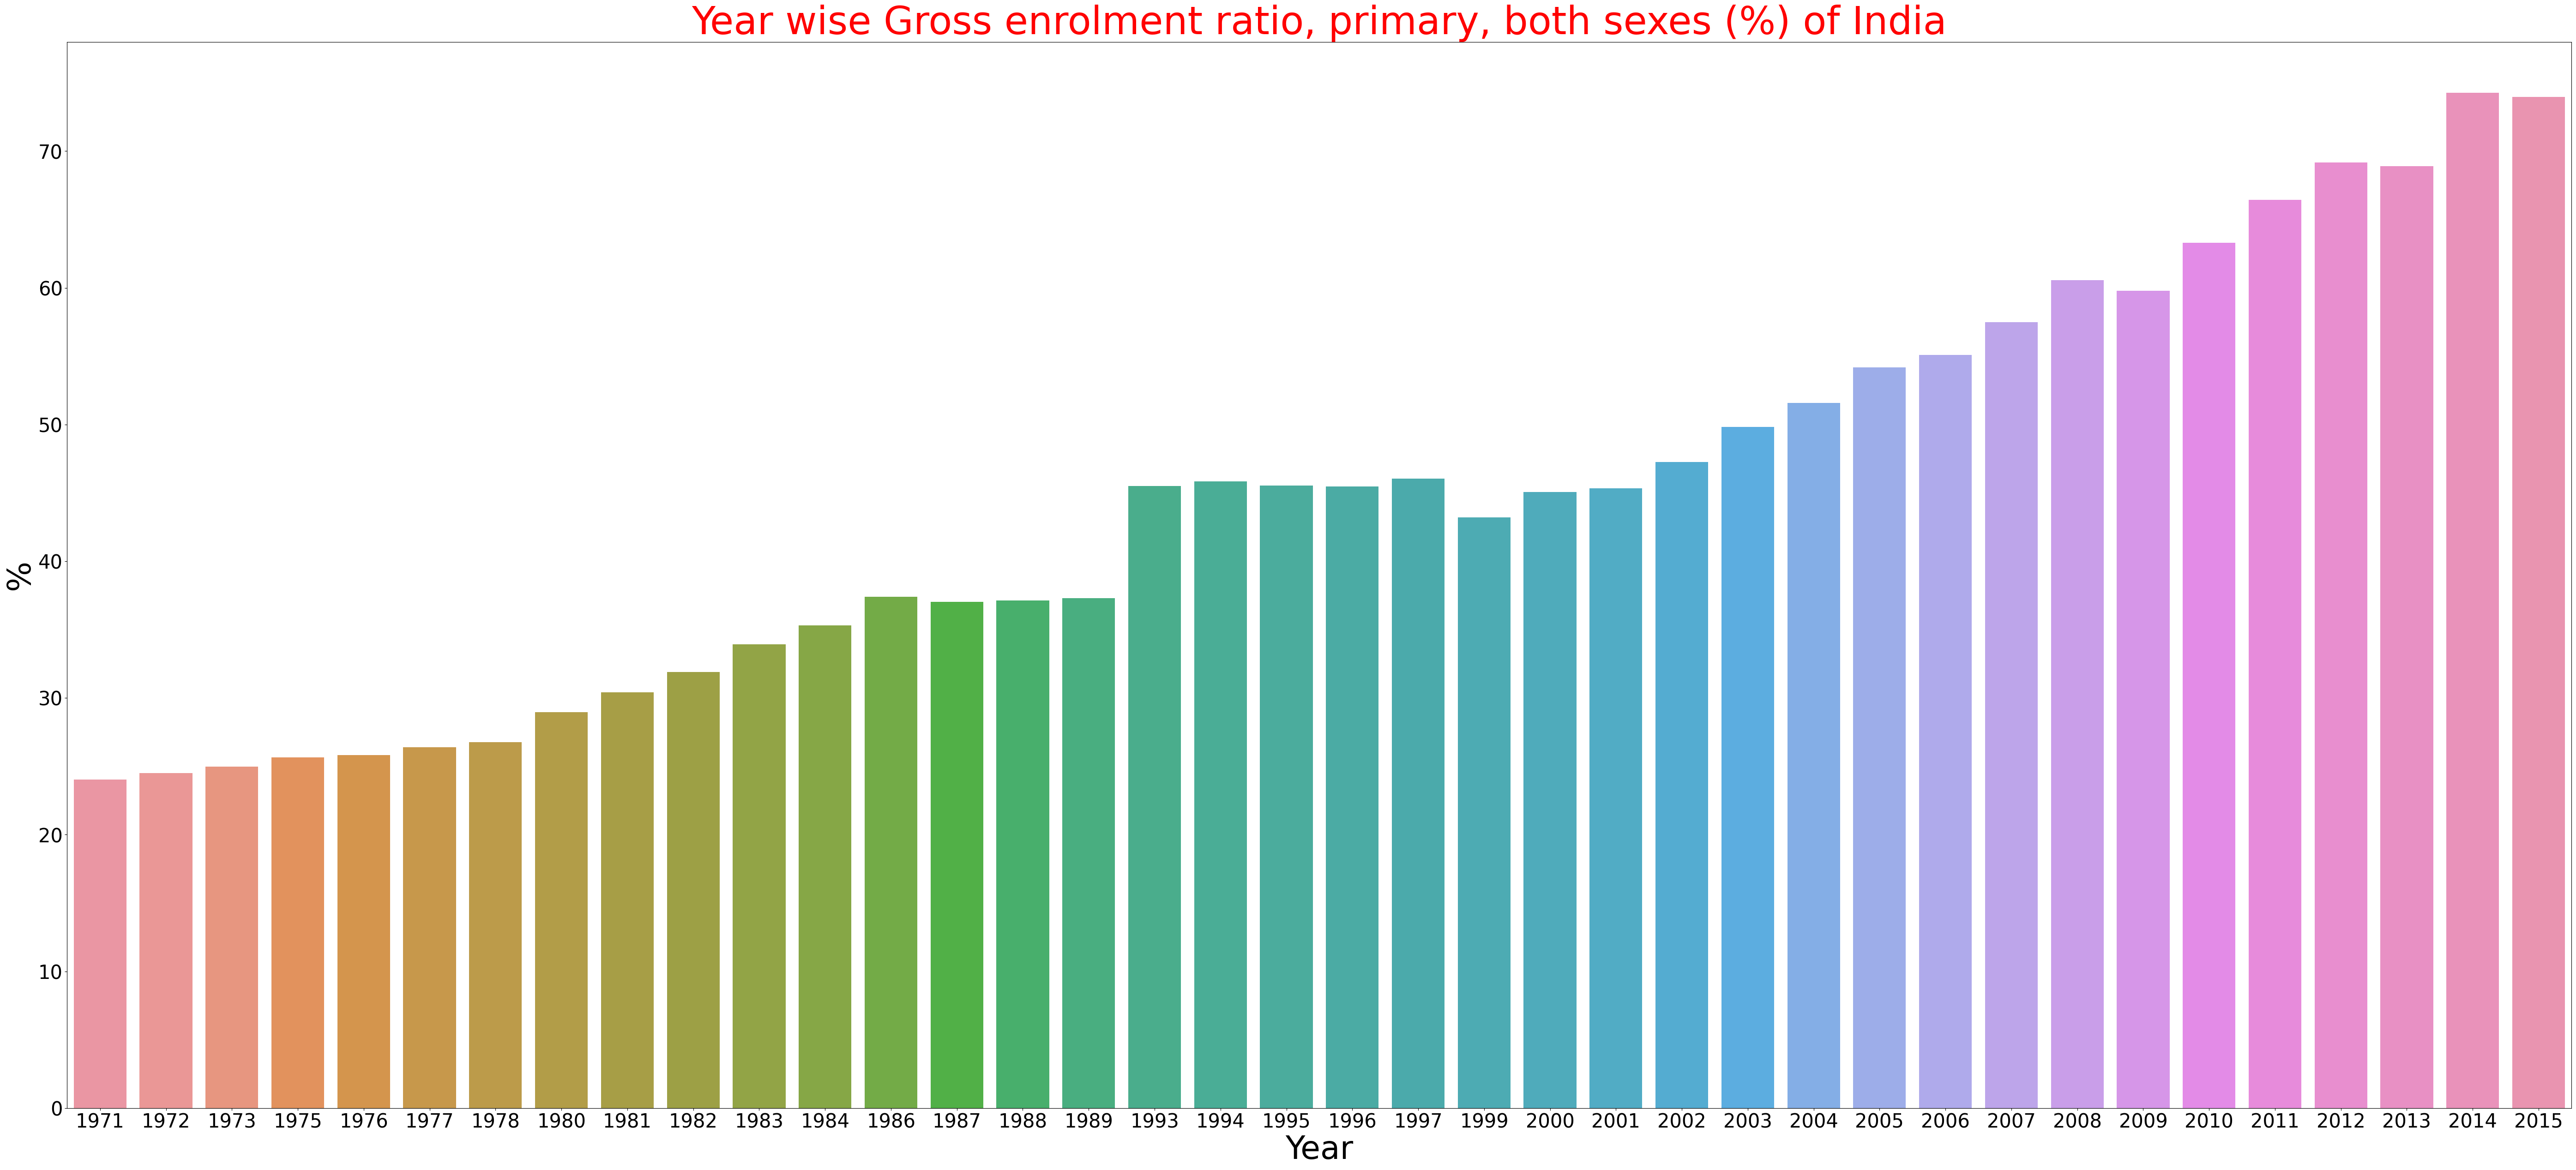

In [ ]:
# Chart - 3 visualization code
COL_10, COL_7, COL_3 = "SE.SEC.ENRR", "Year", "Country Name"
new_df = df[[COL_10, COL_7, COL_3]]
india_yearly = df.loc[df["Country Name"] == "India",  [COL_7, COL_10]].dropna()
plt.figure(figsize=(70,30))
sns.barplot(x=COL_7, y=COL_10, data=india_yearly)
plt.xlabel("Year", fontsize = 50)
plt.ylabel("%", fontsize = 50)
plt.title("Year wise Gross enrolment ratio, primary, both sexes (%) of India", fontsize = 60, color = "red")
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.show()

##### 1. Why did you pick the specific chart?



1.   A year-wise representation of the gross enrollment ratio (GER) in primary education for both sexes in India offers valuable insights into the country's educational landscape

2.   Observing trends can reflect the impact of educational policies, interventions, or socioeconomic changes.



##### 2. What is/are the insight(s) found from the chart?

The GER appears to have increased significantly, especially after the mid-1990s, indicating an improvement in access to and participation in primary education over these years

#### Chart - 4

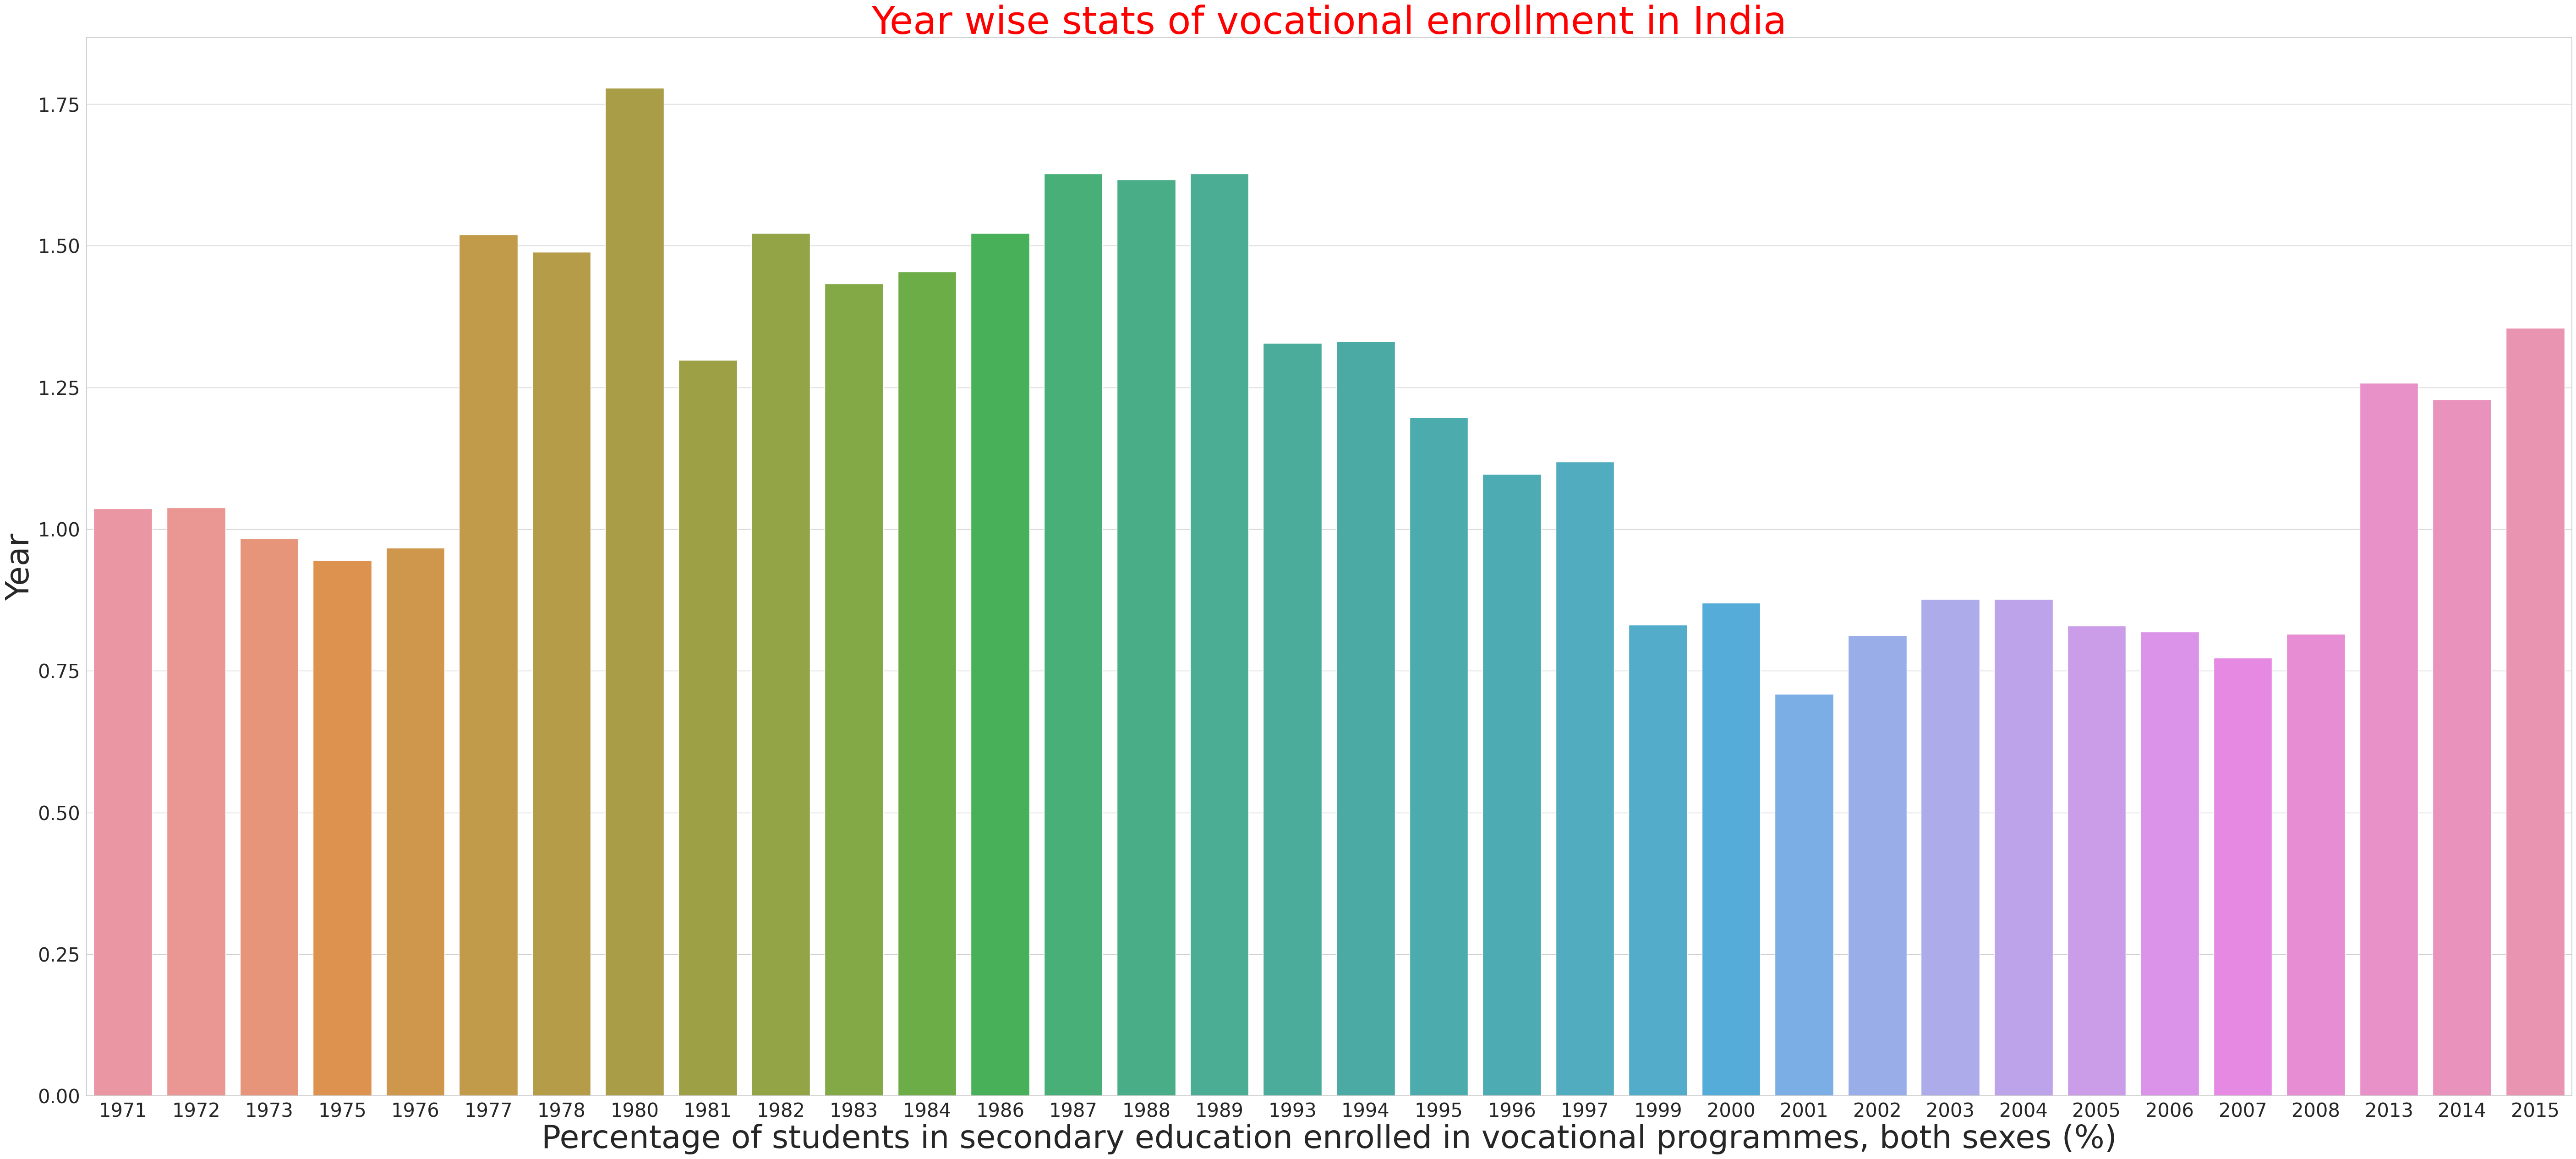

In [ ]:
# Chart - 4 visualization code
COL_1, COL_2, COL_3 = "SE.SEC.ENRL.VO.ZS", "Year", "Country Name"
india_yearly = df.loc[df["Country Name"] == "India",  [COL_2, COL_1]].dropna()
plt.figure(figsize=(70,30))
sns.barplot(x=COL_2, y=COL_1, data=india_yearly)
plt.xlabel("Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)", fontsize = 50)
plt.ylabel("Year", fontsize = 50)
plt.title("Year wise stats of vocational enrollment in India", fontsize = 60, color = "red")
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.show()

##### 1. Why did you pick the specific chart?

The choice of a year-wise trend chart for vocational enrollment in India helps visualize how this enrollment has evolved over time. A line plot or a bar plot with years on the x-axis and the enrollment percentages on the y-axis can effectively show trends and variations across different years.

##### 2. What is/are the insight(s) found from the chart?

There is an increasing trend in vocational enrollment until around 1989, after which there is a noticeable decline.

#### Chart - 5

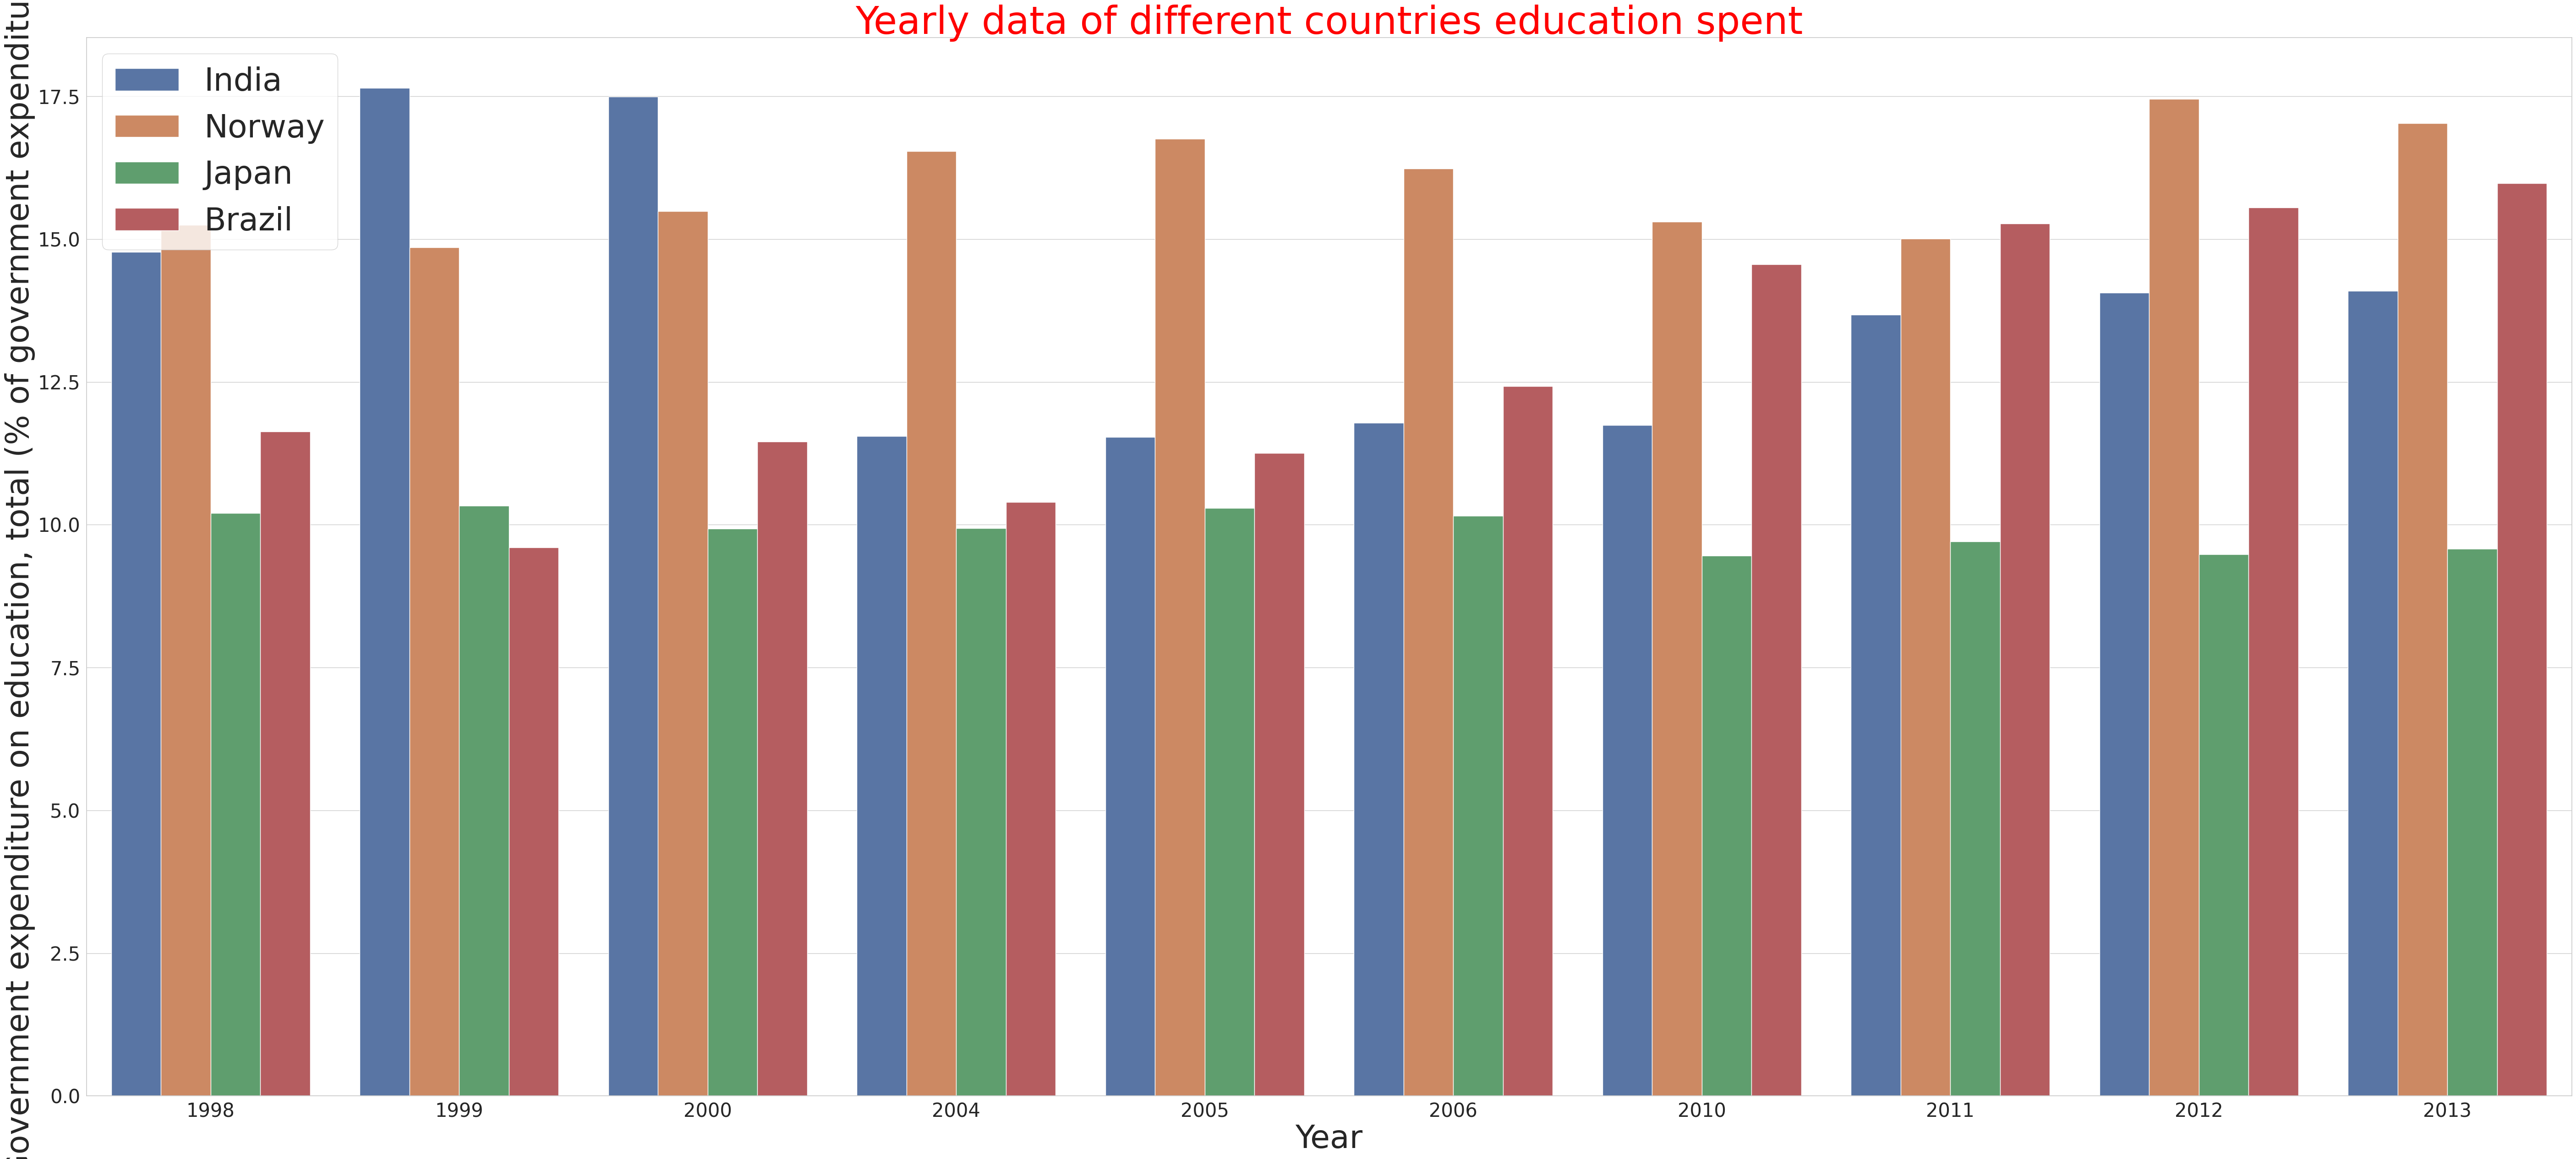

In [ ]:
# Chart - 5 visualization code
enrollment_df = df[df["Country Name"].isin({"India", "Norway", "Brazil", "Japan"})]
COL_1, COL_2 = "SE.XPD.TOTL.GB.ZS", "Year"
enrollment_df = enrollment_df[[COL_1, COL_2, "Country Name"]]
enrollment_df.dropna(inplace=True)

enrollment_df = enrollment_df.pivot(index="Year", columns="Country Name", values=COL_1)[["India", "Norway", "Japan", "Brazil"]].dropna()
enrollment_df = enrollment_df.melt(value_vars=["India", "Norway", "Japan", "Brazil"], ignore_index=False)

sns.set(style="whitegrid")
plt.figure(figsize=(70,50))
sns.barplot(x=enrollment_df.index, y='value', data=enrollment_df, hue='Country Name')
plt.title('Yearly data of different countries education spent', fontsize = 60, color = "red")
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('Year', fontsize = 50)
plt.ylabel('Government expenditure on education', fontsize = 50)
plt.legend(fontsize = 50)
plt.show()


##### 1. Why did you pick the specific chart?

Grouped bar chart can provide insights into how these specific countries prioritize educational investment and the relative importance they assign to education within their governmental budgets

##### 2. What is/are the insight(s) found from the chart?



1.   India has maintained a relatively stable but low percentage of government expenditure on education.
2.   Brazil has shown significant improvement over the years in increasing its government’s spending on education.
3.   Japan’s spending fluctuates but remains higher than India and lower than Norway and Brazil in recent years.
4.   Norway consistently allocates the highest percentage of its government expenditure to education.


#### Chart - 6

In [ ]:
# Chart - 6 visualization code
fig = px.choropleth(df.loc[df["Year"].astype(int) >= 1990], locations='Country Name', color='SL.UEM.TOTL.ZS', scope='world', animation_frame='Year', locationmode = "country names", width=1500, height=800,
                    title="Unemployment, total (% of total labor force) in the world over the years")
fig.show()

##### 1. Why did you pick the specific chart?

Unemployment rates are significant socio-economic indicators that impact various aspects of a country's well-being. This chart aids in analyzing the economic health and stability of different nations.

##### 2. What is/are the insight(s) found from the chart?



1.   Patterns in unemployment rates over the years provide insights into global economic conditions. Peaks and troughs could correspond to economic recessions, recoveries, or periods of stability, such as the 2008 financial crisis, revealing the profound impact of such events on global employment.
2.   Changes in unemployment rates in different regions might reflect economic development stages. For instance, developing countries might experience higher fluctuations due to changing economic structures.

#### Chart - 7

-0.8369098072169898


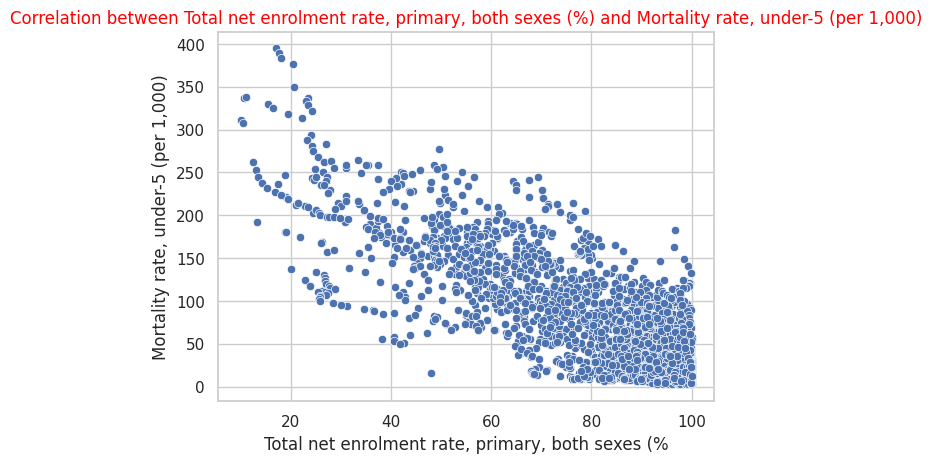

In [ ]:
# Chart - 7 visualization code
COL_8, COL_9, COL_3 = "UIS.NERT.1", "SH.DYN.MORT", "Country Name" ##"Total net enrolment rate, primary, both sexes (%)" and "Mortality rate, under-5 (per 1,000)"
new_df = df[[COL_8, COL_9, COL_3]]
sns.scatterplot(x=COL_8, y=COL_9, data=new_df)
print(new_df[COL_8].corr(new_df[COL_9]))
plt.xlabel("Total net enrolment rate, primary, both sexes (%")
plt.ylabel("Mortality rate, under-5 (per 1,000)")
plt.title("Correlation between Total net enrolment rate, primary, both sexes (%) and Mortality rate, under-5 (per 1,000)", color = "red")
plt.show()

##### 1. Why did you pick the specific chart?


1.   Analyzing the correlation between the total net enrollment rate in primary education and the under-5 mortality rate provides insights into potential relationships between education and child well-being
2.   Understanding any correlation can inform policies targeting child education and health simultaneously.


##### 2. What is/are the insight(s) found from the chart?

As the enrolment rate increases, the mortality rate tends to decrease.
This suggests that there is a relationship between the two variables, and that increasing enrolment rates in primary education can have a positive impact on reducing mortality rates for children under 5.

#### Chart - 8

0.5792105010040284


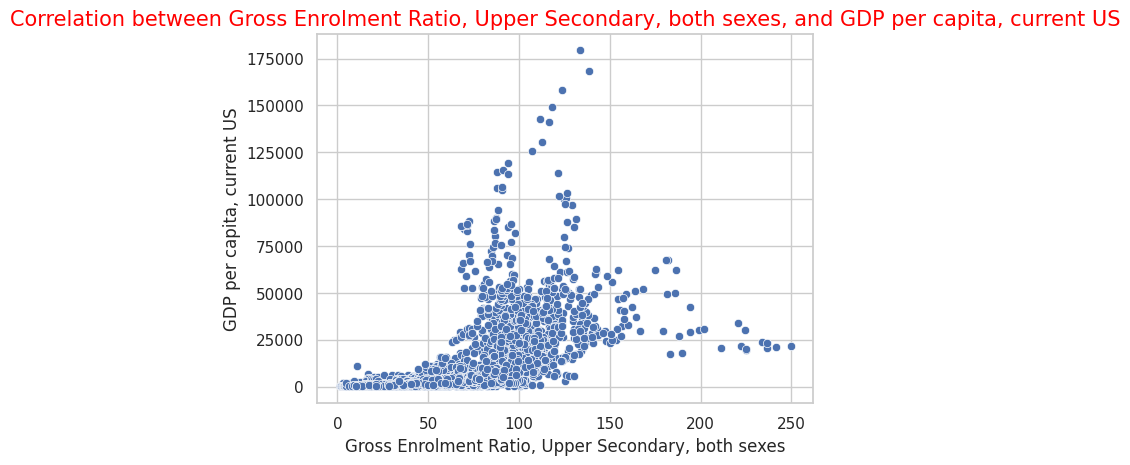

In [ ]:
# Chart - 8 visualization code
COL_1, COL_2, COL_3 = "SE.SEC.ENRR.UP","NY.GDP.PCAP.CD", "Country Name" ## "Gross Enrolment Ratio, Upper Secondary, both sexes, and GDP per capita, current US$"
new_df = df[[COL_1, COL_2, COL_3]]
sns.scatterplot(x=COL_1, y=COL_2, data=new_df)
print(new_df[COL_1].corr(new_df[COL_2]))
plt.xlabel("Gross Enrolment Ratio, Upper Secondary, both sexes")
plt.ylabel("GDP per capita, current US")
plt.title("Correlation between Gross Enrolment Ratio, Upper Secondary, both sexes, and GDP per capita, current US", fontsize = 15, color = "red")
plt.show()

##### 1. Why did you pick the specific chart?

Analyzing the correlation between the gross enrollment ratio in upper secondary education and GDP per capita helps explore potential relationships between education at this level and a country's economic prosperity

##### 2. What is/are the insight(s) found from the chart?

Shows a positive correlation between the Gross Enrolment Ratio in upper secondary education for both sexes and GDP per capita in current US dollars. As GDP per capita increases, there is a general trend of increased GER, indicating that higher income levels are associated with higher enrolment rates in upper secondary education.

#### Chart - 9

0.7136918413611495


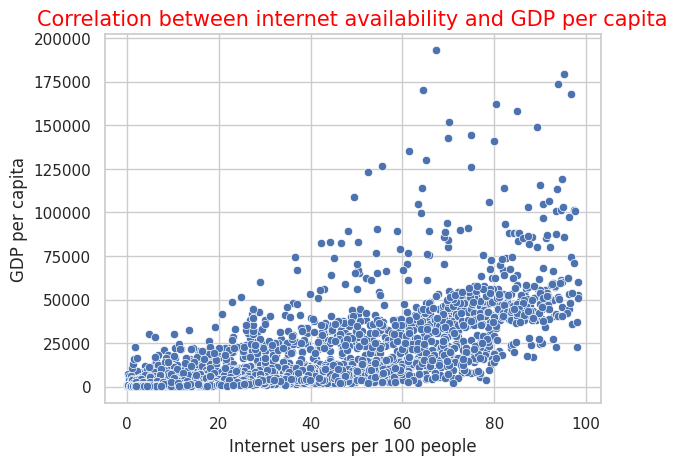

In [ ]:
# Chart - 9 visualization code
COL_1, COL_2, COL_3 = "IT.NET.USER.P2", "NY.GDP.PCAP.CD", "Country Name" ##Internet users per 100 people and GDP per capita
new_df = df[[COL_1, COL_2, COL_3]]
new_df = new_df.iloc[7262:] # data from the year 2000 to the year 2016
sns.scatterplot(x=COL_1, y=COL_2, data=new_df)
print(new_df[COL_1].corr(new_df[COL_2]))
plt.xlabel("Internet users per 100 people")
plt.ylabel("GDP per capita")
plt.title("Correlation between internet availability and GDP per capita", fontsize = 15, color = "red")
plt.show()

##### 1. Why did you pick the specific chart?

1.   Analyzing the correlation between internet availability and GDP per capita allows exploring potential relationships between technological infrastructure and economic development.
2.   Insights can guide policies for technological advancement and economic development.



##### 2. What is/are the insight(s) found from the chart?

Shows a positive correlation between internet availability and GDP per capita. As the number of internet users per 100 people increases, the GDP per capita also tends to increase. This suggests that countries with higher internet availability are likely to have a higher GDP per capita.

Answer Here

#### Chart - 10

0.8207491342413383


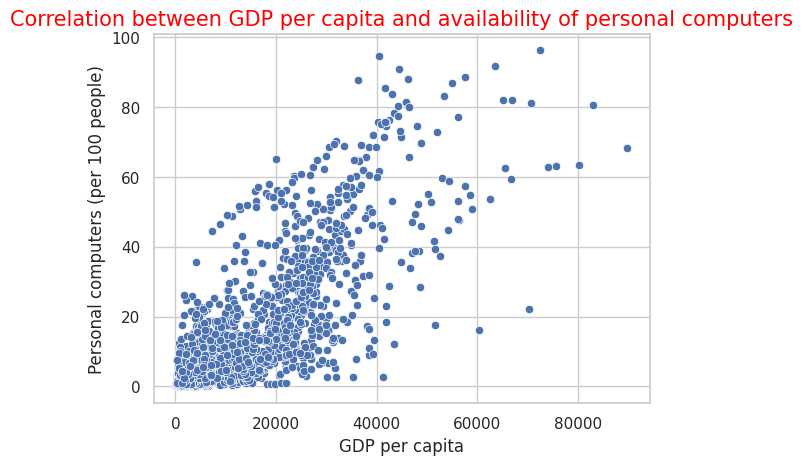

In [ ]:
# Chart - 10 visualization code
COL_1, COL_2, COL_3 = "NY.GDP.PCAP.CD", "IT.CMP.PCMP.P2", "Country Name" ## GDP per capita and Personal computers (per 100 people)
new_df = df[[COL_1, COL_2, COL_3]]
sns.scatterplot(x=COL_1, y=COL_2, data=new_df)
print(new_df[COL_1].corr(new_df[COL_2]))
plt.xlabel("GDP per capita")
plt.ylabel("Personal computers (per 100 people)")
plt.title("Correlation between GDP per capita and availability of personal computers", fontsize = 15, color = "red")
plt.show()

##### 1. Why did you pick the specific chart?




1.   Assessing the correlation between GDP per capita and personal computer availability explores the potential relationship between technological access and economic wealth.
2.   Insights can guide policies for technological advancement and economic growth strategies.



##### 2. What is/are the insight(s) found from the chart?

Shows a positive correlation between GDP per capita and the availability of personal computers. As GDP per capita increases, the number of personal computers per 100 people also tends to increase. This suggests that as countries become wealthier, more people have access to personal computers.

#### Chart - 11


-0.6913737023681861


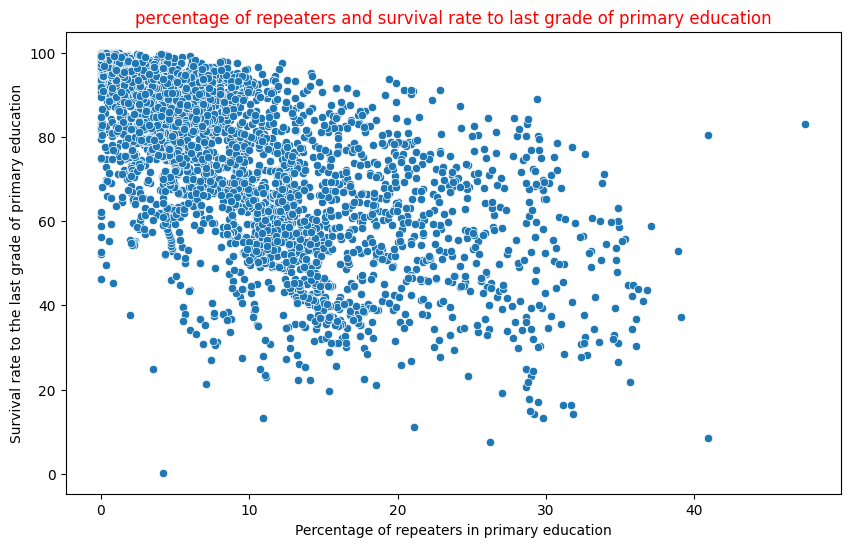

In [ ]:
# Chart - 11 visualization code
COL_4, COL_5, COL_3 = "SE.PRM.REPT.ZS", "SE.PRM.PRSL.ZS", "Country Name"
new_df = df[[COL_4, COL_5, COL_3]]
plt.figure(figsize=(10, 6))
sns.scatterplot(x=COL_4, y=COL_5, data=new_df)
print(new_df["SE.PRM.REPT.ZS"].corr(new_df["SE.PRM.PRSL.ZS"]))
plt.xlabel("Percentage of repeaters in primary education")
plt.ylabel("Survival rate to the last grade of primary education")
plt.title("Percentage of repeaters and survival rate to last grade of primary education", color="red")
plt.show()

##### 1. Why did you pick the specific chart?

Understanding the relationship between the percentage of repeaters and the survival rate to the last grade of primary education is crucial for evaluating the educational system's effectiveness.
A scatter or line plot allows for a direct comparison between the percentage of repeaters and the survival rate, highlighting any correlations or divergences between the two.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a negative correlation between the percentage of repeaters in primary education and the survival rate to the last grade of primary education. As the percentage of repeaters increases, the survival rate to the last grade decreases. This suggests that education system is strongly affective

#### Chart - 12

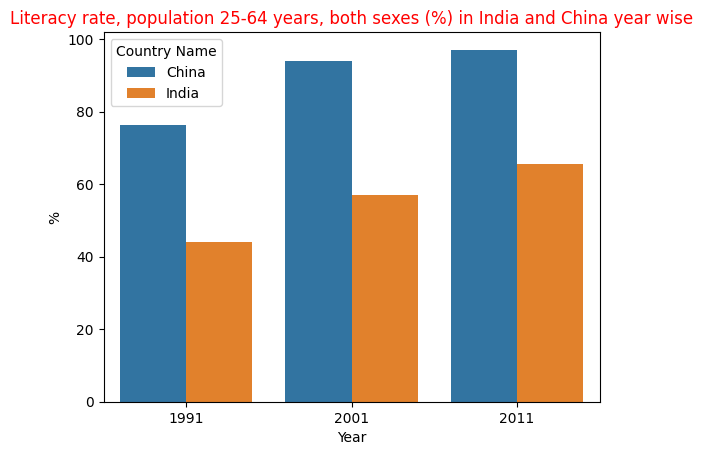

In [ ]:
# Chart - 12 visualization code
COL_1, COL_2, COL_3 = "UIS.LR.AG25T64", "Year", "Country Name" ##"Literacy rate, population 25-64 years, both sexes (%)"
india_yearly = df.loc[df["Country Name"].isin(["India", "China"]), [COL_2, COL_1, COL_3]].dropna()
india_yearly = india_yearly.loc[india_yearly["Year"].isin(["1990", "1991", "2000", "2001", "2010", "2011"])]

india_yearly['Year'].replace("1990", "1991", inplace=True)
india_yearly['Year'].replace("2000", "2001", inplace=True)
india_yearly['Year'].replace("2010", "2011", inplace=True)

sns.barplot(x=COL_2, y=COL_1, data=india_yearly, hue="Country Name")
plt.xlabel("Year")
plt.ylabel("%")
plt.title("Literacy rate, population 25-64 years, both sexes (%) in India and China year wise", color = "red")
plt.show()

##### 1. Why did you pick the specific chart?

India and China are two significant countries with substantial populations. Comparing their literacy rates provides insights into the educational progress and differences between these populous nations.

##### 2. What is/are the insight(s) found from the chart?

1.   In all three years China had a higher literacy rate compared to India.

2.   Both countries experienced an increase in literacy rates over these two decades.



#### Chart - 13

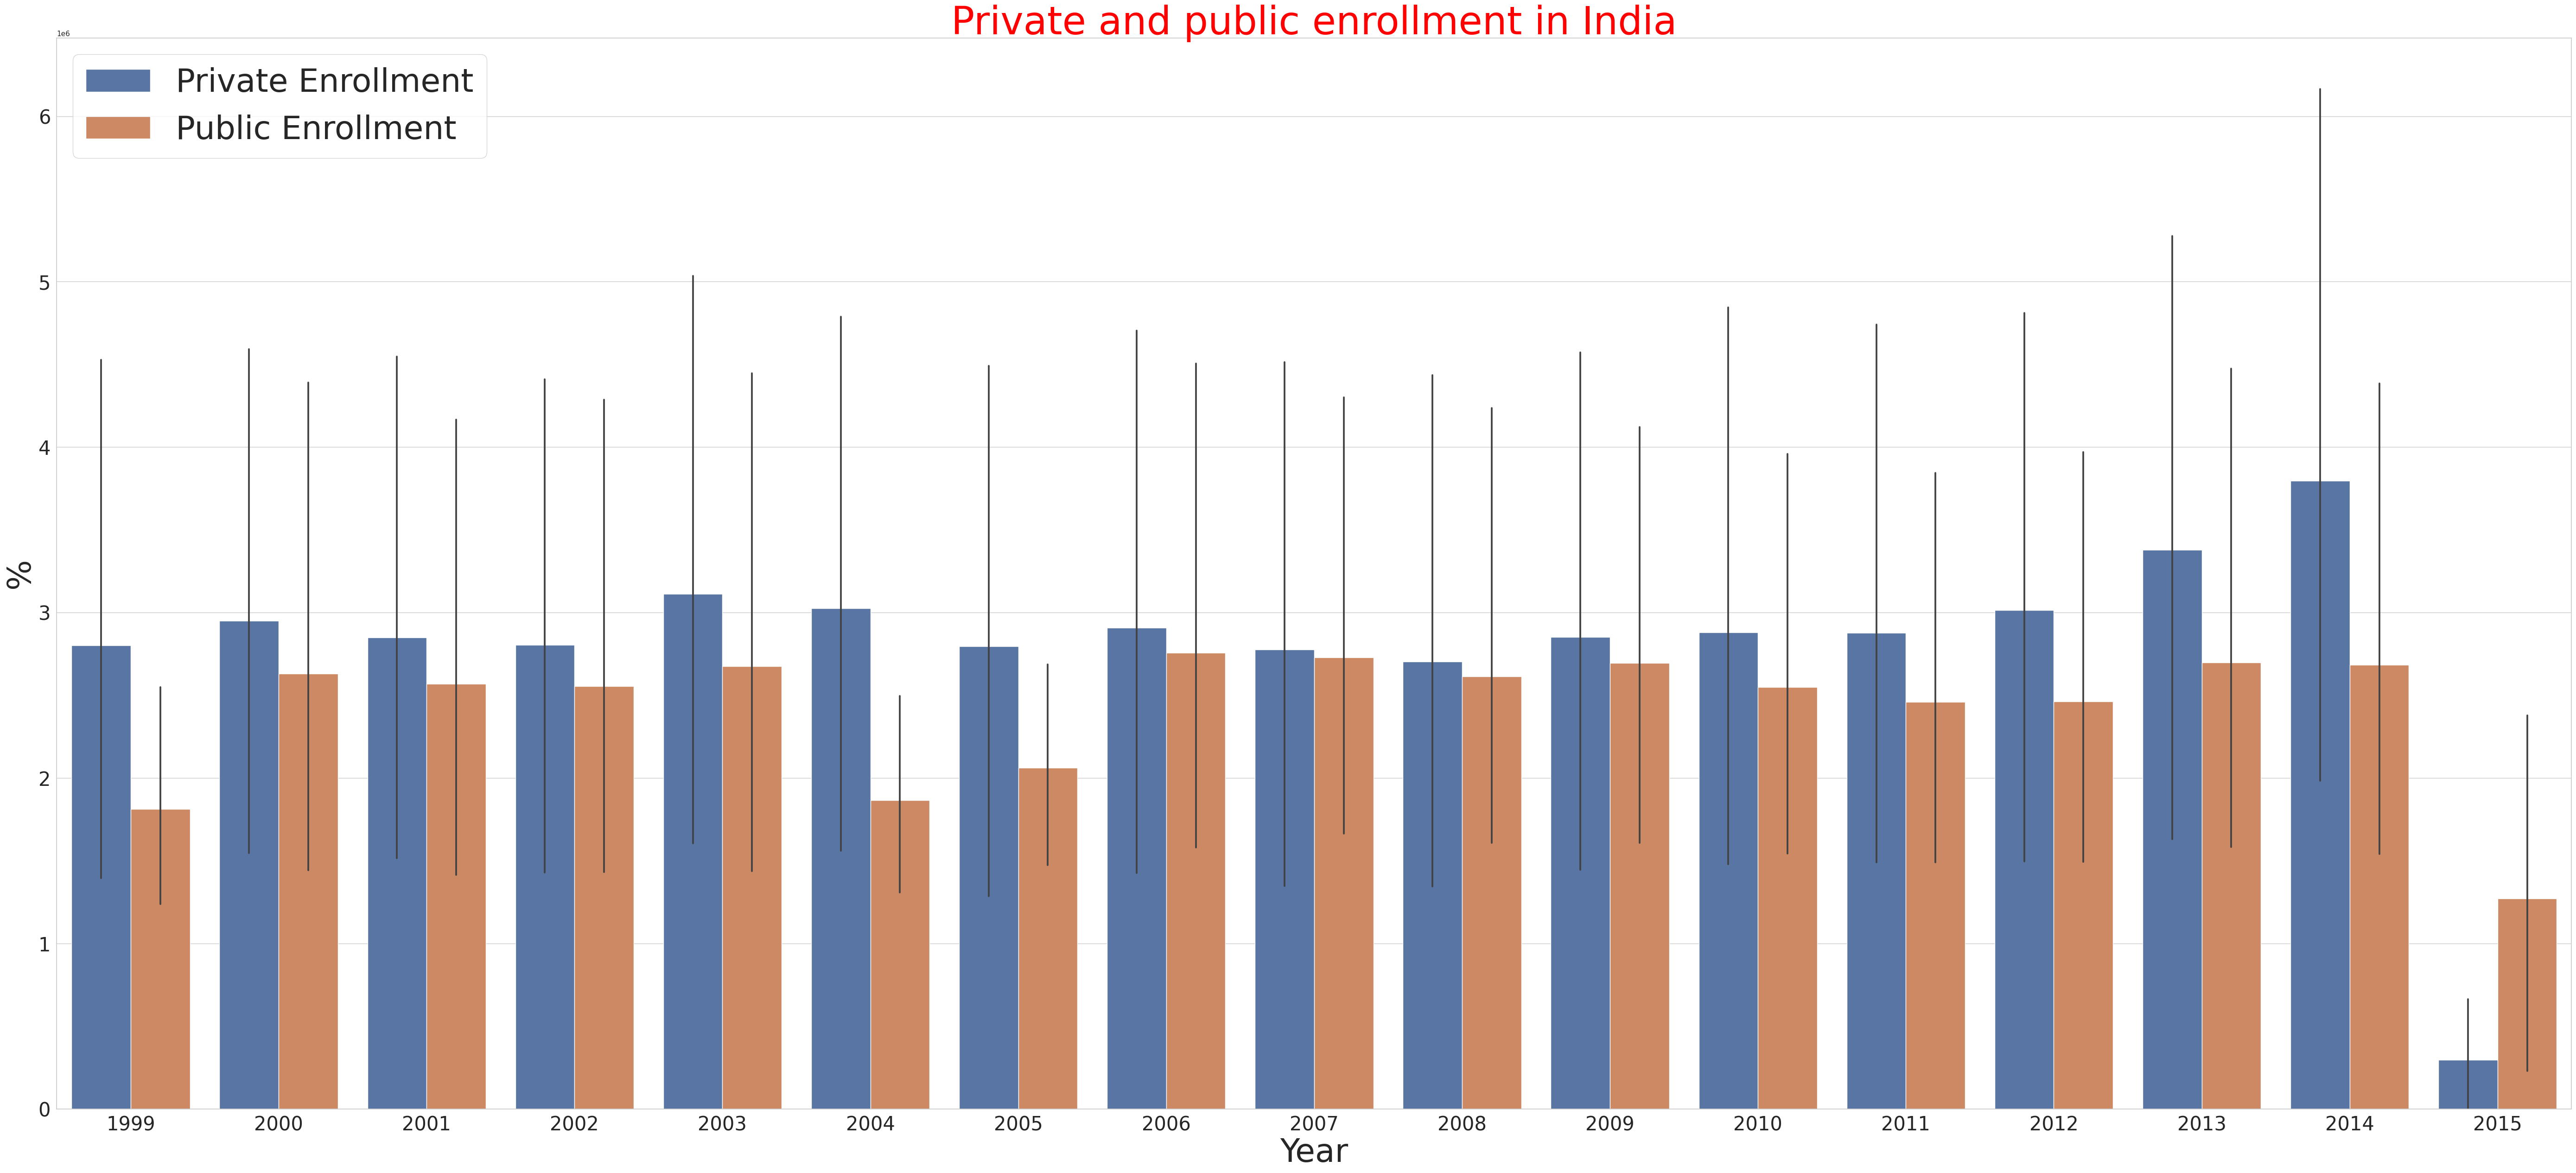

In [ ]:
# Chart - 13 visualization code
COL_11, COL_12, COL_7 = "UIS.E.1.PR", "UIS.E.1.PU", "Year"
new_df = df[[COL_11, COL_12, COL_7]]
new_df = new_df.iloc[7020:]
new_df = new_df.melt(value_vars=[COL_11, COL_12], id_vars=[COL_7]).dropna()
plt.figure(figsize=(70,30))
sns.barplot(x="Year", y="value", data=new_df, hue="Indicator Code")
plt.xlabel("Year", fontsize = 50)
plt.ylabel("%", fontsize = 50)
plt.title("Private and public enrollment in India", fontsize = 60, color = "red")
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
handles, labels = plt.gca().get_legend_handles_labels()
legend_labels = ['Private Enrollment', 'Public Enrollment']
plt.legend(handles=handles, labels=legend_labels, fontsize = 50)
plt.show()

##### 1. Why did you pick the specific chart?

Creating a bar plot to compare private and public enrollment in India offers a clear visual comparison between these two sectors within the country's education system

##### 2. What is/are the insight(s) found from the chart?

Both private and public enrollments have fluctuated over the years. Private enrollment has generally been higher than public enrollment, with noticeable peaks in 2004, 2012, and 2013.

#### Chart - 14 - Correlation Heatmap

<ipython-input-12-9a0317c2c0bf>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm')


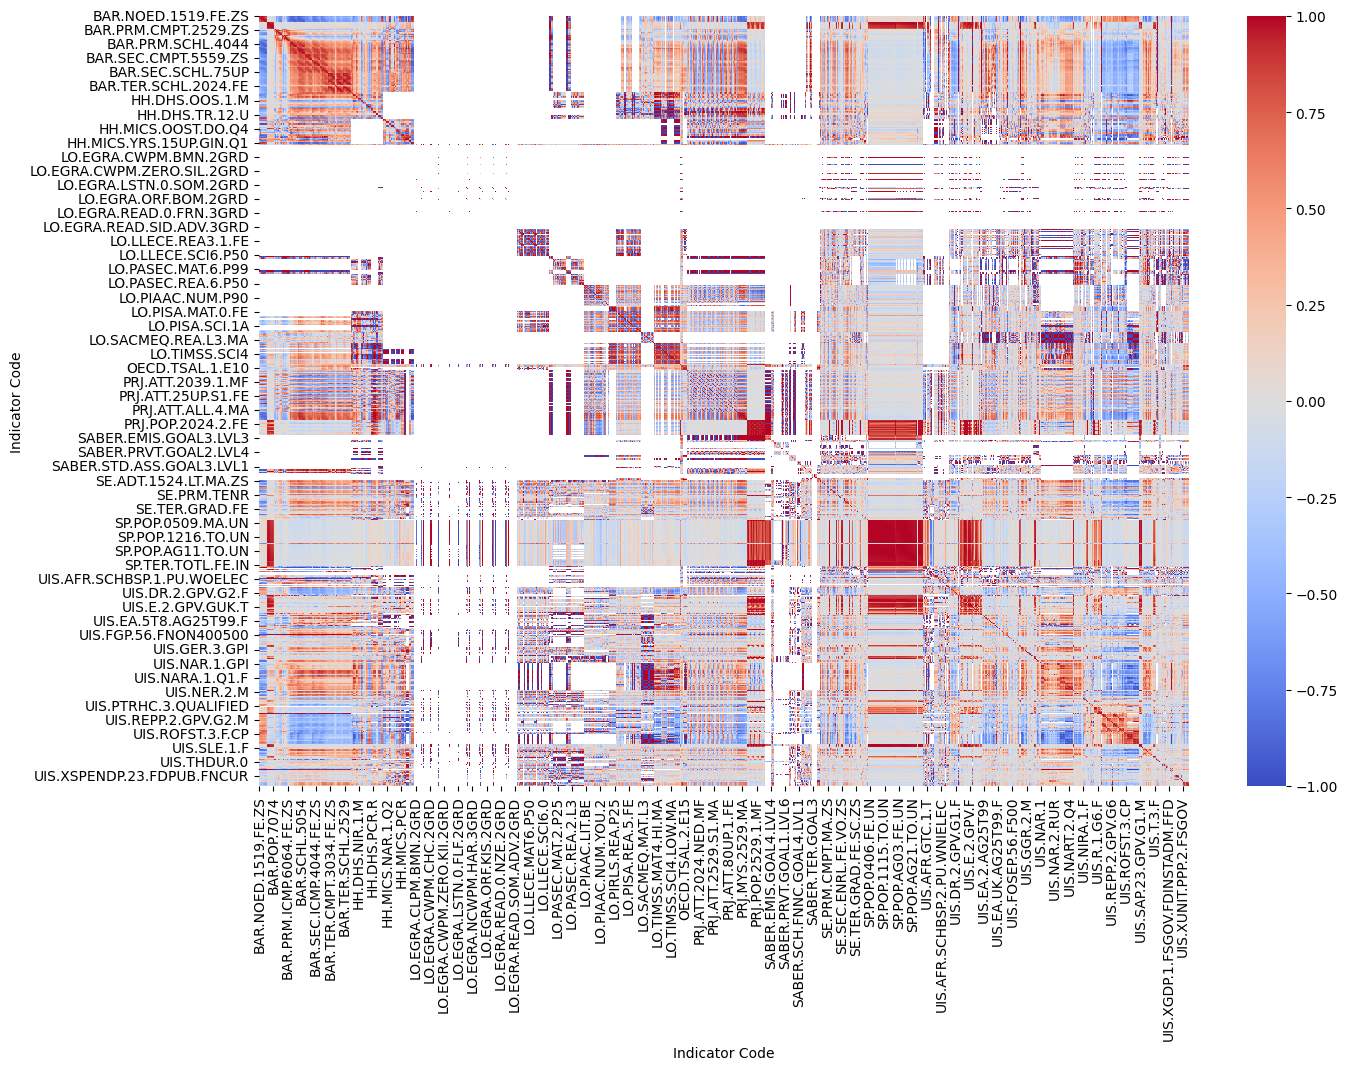

In [ ]:
df = df.drop(columns="Year")
correlation_matrix = df.corr(min_periods=50, numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

By calculating correlations between different variables in a dataset, we can identify relationships between pairs of features. This helps in understanding how variables are related to each other, whether positively correlated or negatively correlated

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

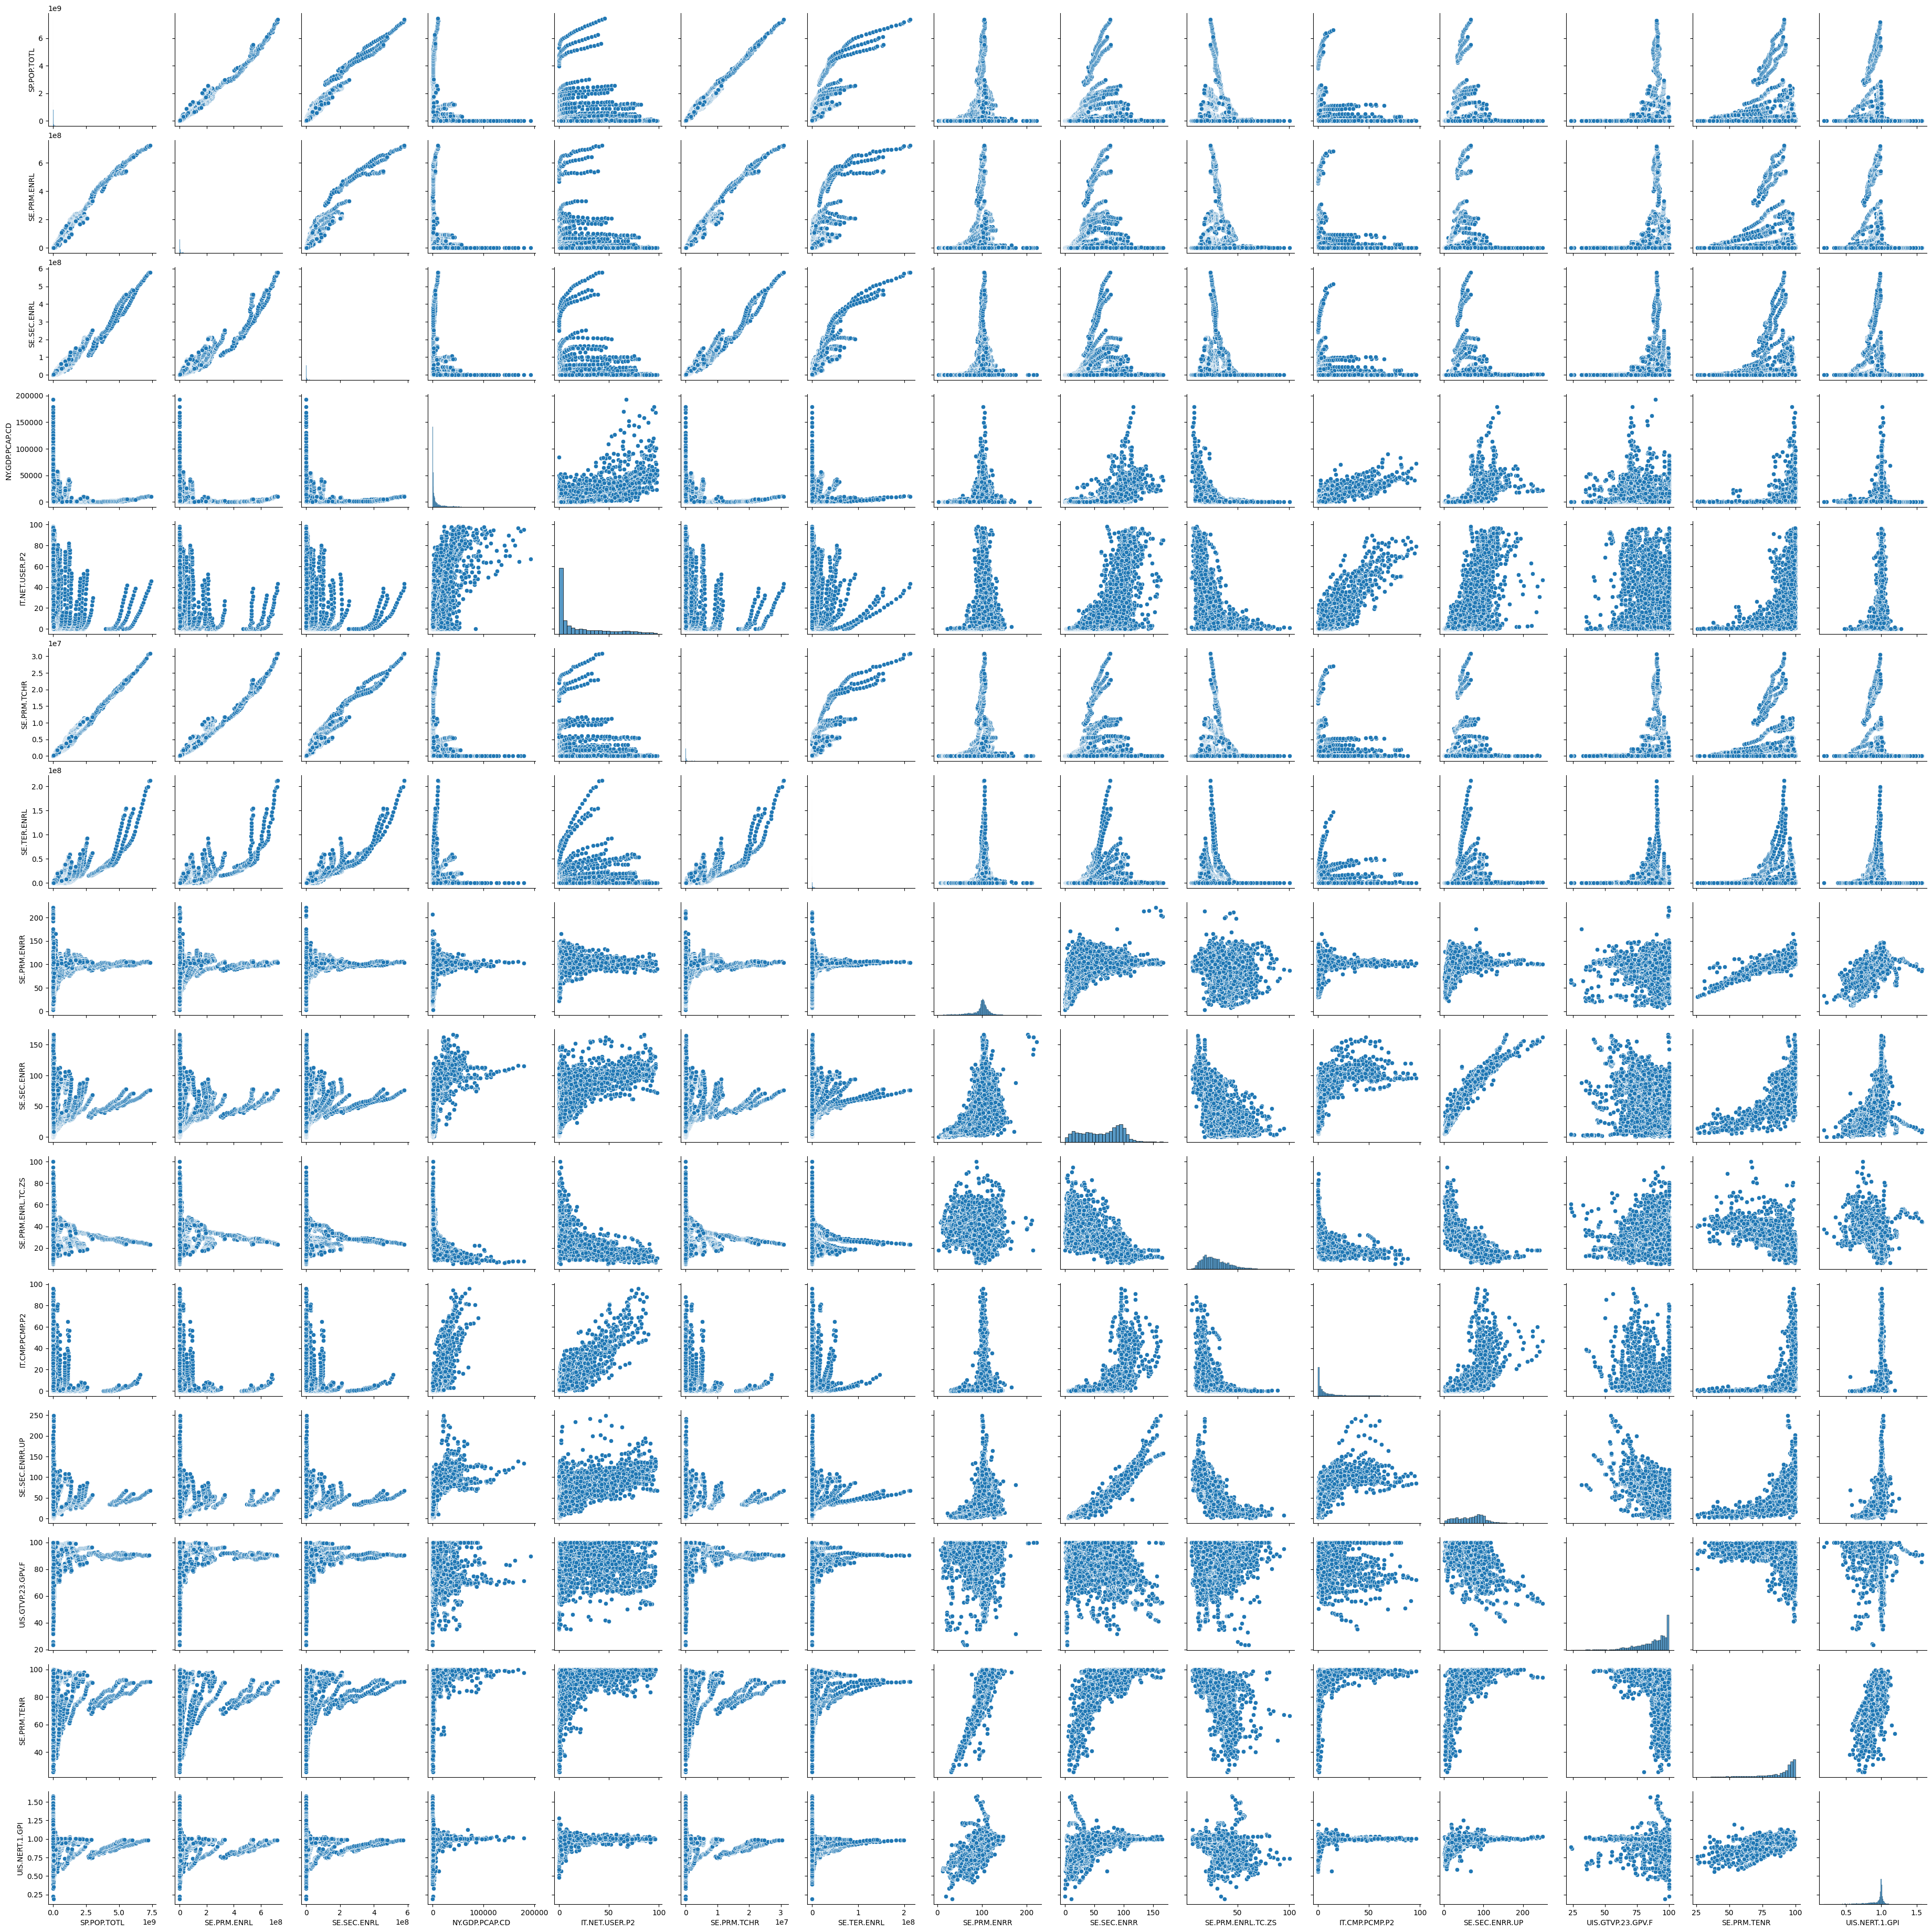

In [ ]:
# Pair Plot visualization code
small_df = df[["SP.POP.TOTL","SE.PRM.ENRL","SE.SEC.ENRL","NY.GDP.PCAP.CD","IT.NET.USER.P2","SE.PRM.TCHR","SE.TER.ENRL","SE.PRM.ENRR","SE.SEC.ENRR","SE.PRM.ENRL.TC.ZS","IT.CMP.PCMP.P2","SE.SEC.ENRR.UP","UIS.GTVP.23.GPV.F","SE.PRM.TENR","UIS.NERT.1.GPI"]]
small_df = small_df.reset_index(drop=True)
sns.pairplot(small_df)
plt.show()

##### 1. Why did you pick the specific chart?

It helps in visually inspecting potential correlations or patterns between pairs of variables, facilitating the identification of any interesting relationships or trends that might exist within the dataset.

# **Conclusion**

This exploratory data analysis project provided insightful visualization-driven analytics on educational statistics across countries and years. Using datasets on various indicators spanning enrollment ratios, public spending, literacy, technology access etc., the analysis revealed interesting trends, correlations and cross-country comparisons.

Key takeaways include the positive correlation between increasing GDP per capita and improvements in education metrics like gross enrollment ratios, literacy rates and access to internet/computers. Developed regions like Europe, North America showed higher overall educational outcomes compared to developing countries, but fast progress was observed in some developing countries in recent decades. There are still noticeable gender gaps in enrollment and literacy in low-income countries, requiring policy interventions.

The structured analysis methodology using univariate, bivariate and multivariate techniques ensured comprehensive coverage of the dataset to arrive at data-backed recommendations. The visualization choices and commentary aided interpretability and actionable insights around linkages of education with economic growth, technologization etc. This can help policy makers prioritize focus areas like public expenditure, infrastructure, enrollment incentives and skill development.